<a href="https://colab.research.google.com/github/iamsiamhossen/AI-/blob/main/HeartDeaseaseFinal22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install imbalanced-learn

In [3]:
pip install tensorflow

In [4]:
pip install scikeras

In [5]:
pip install xgboost

In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [7]:
file_path =("/content/HeartDisease.csv")
df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df.value_counts('target')

,count
target,
1,526
0,499


In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [12]:
corr_matrix = numeric_df.corr()

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Correlation-Based**

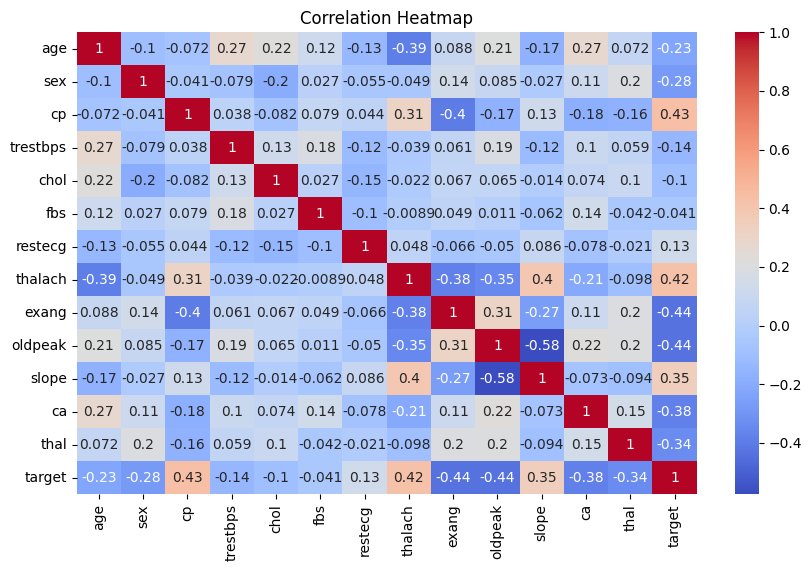

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
target_col = 'target'
corr_target = corr_matrix[target_col].sort_values(ascending=False)
print("Correlation with Target:\n", corr_target)

Correlation with Target:
 target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [16]:
selected_features_corr = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal']


# **INFORMATION GAIN**

In [17]:
from sklearn.feature_selection import mutual_info_classif

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
X = pd.get_dummies(X)

In [20]:
info_gain = mutual_info_classif(X, y)

In [21]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': info_gain
}).sort_values(by='Information_Gain', ascending=False)

print(feature_scores)

     Feature  Information_Gain
4       chol          0.268117
7    thalach          0.162196
9    oldpeak          0.152312
12      thal          0.150755
2         cp          0.140005
11        ca          0.134853
8      exang          0.115023
3   trestbps          0.099499
10     slope          0.081893
0        age          0.052442
1        sex          0.030369
5        fbs          0.027580
6    restecg          0.022998


/tmp/ipython-input-856833001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Information_Gain', y='Feature', data=feature_scores, palette='viridis')


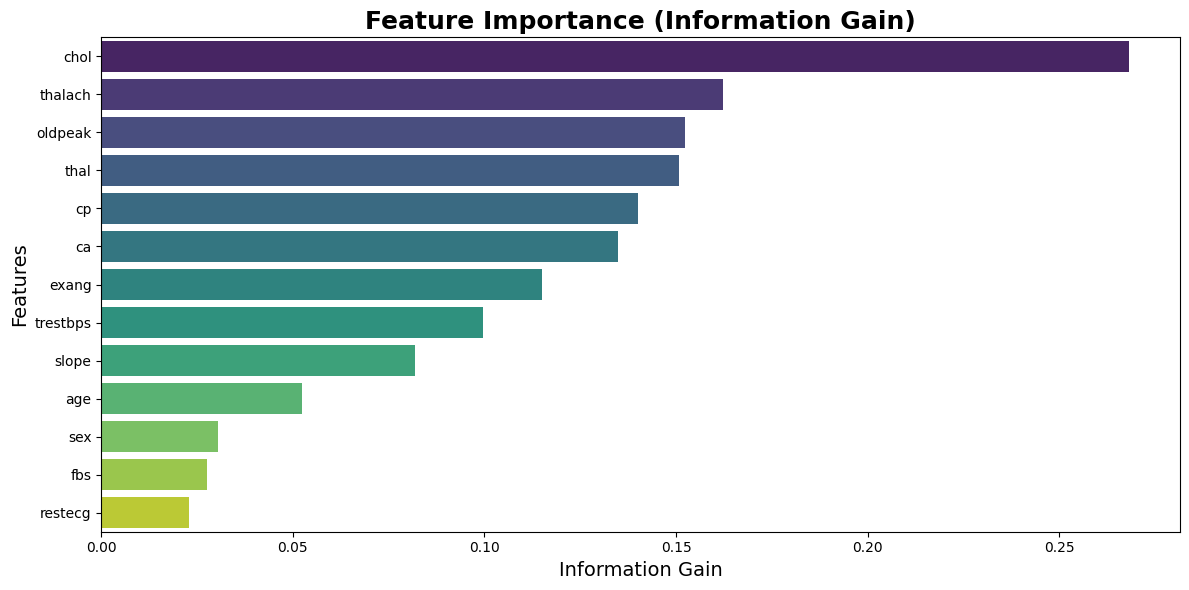

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Information_Gain', y='Feature', data=feature_scores, palette='viridis')

plt.title("Feature Importance (Information Gain)", fontsize=18, weight='bold')
plt.xlabel("Information Gain", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

def entropy(col):
    elements, counts = np.unique(col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

X = df.drop('target', axis=1)
y = df['target']

X = pd.get_dummies(X)

gain_ratios = []
target_entropy = entropy(y)

for feature in X.columns:
    info_gain_feature = mutual_info_classif(X[[feature]], y)[0]
    split_info = entropy(X[feature])
    gain_ratio = info_gain_feature / split_info if split_info != 0 else 0
    gain_ratios.append((feature, gain_ratio))

gain_ratio_df = pd.DataFrame(gain_ratios, columns=['Feature', 'Gain_Ratio']).sort_values(by='Gain_Ratio', ascending=False)
print(gain_ratio_df)


     Feature  Gain_Ratio
8      exang    0.130803
12      thal    0.098524
2         cp    0.090750
11        ca    0.077160
10     slope    0.060426
4       chol    0.037943
9    oldpeak    0.037142
7    thalach    0.028322
1        sex    0.020699
6    restecg    0.018547
3   trestbps    0.017187
5        fbs    0.014328
0        age    0.010773


In [24]:
final_selected_features = ['exang', 'cp', 'oldpeak', 'ca', 'thal', 'thalach', 'slope']


/tmp/ipython-input-2916055719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gain_Ratio', y='Feature', data=gain_ratio_df, palette='magma')


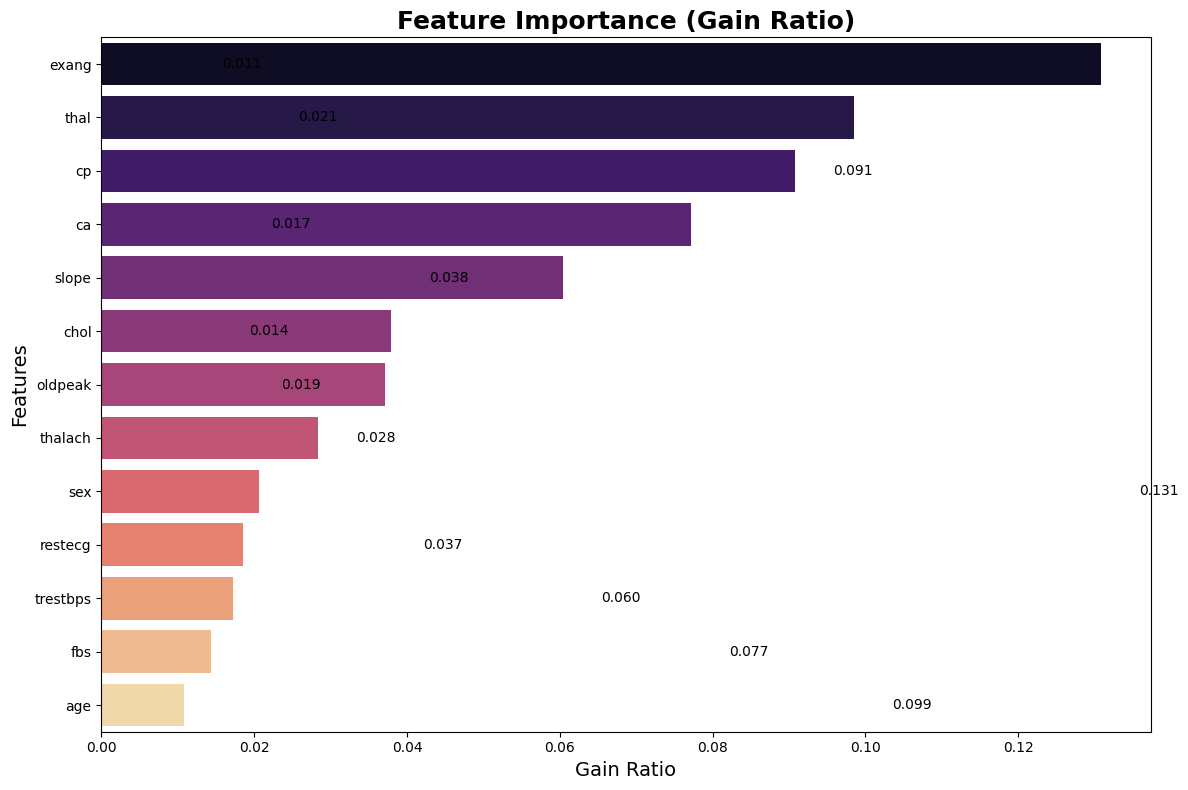

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='Gain_Ratio', y='Feature', data=gain_ratio_df, palette='magma')

plt.title("Feature Importance (Gain Ratio)", fontsize=18, weight='bold')
plt.xlabel("Gain Ratio", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Value labels
for index, row in gain_ratio_df.iterrows():
    plt.text(row['Gain_Ratio'] + 0.005, index, f"{row['Gain_Ratio']:.3f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# **Hybrid Feature Selection**

In [26]:

corr_features = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal']
info_gain_features = ['chol', 'thalach', 'oldpeak', 'cp', 'ca', 'thal', 'exang']
gain_ratio_features = ['exang', 'thal', 'cp', 'ca', 'slope', 'sex', 'oldpeak']

set_corr = set(corr_features)
set_info = set(info_gain_features)
set_gain = set(gain_ratio_features)


common_all = set_corr & set_info & set_gain

common_two = (set_corr & set_info) | (set_corr & set_gain) | (set_info & set_gain)

print(" Common in all three methods:", common_all)
print(" Common in at least two methods:", common_two)


 Common in all three methods: {'thal', 'exang', 'cp', 'ca', 'oldpeak'}
 Common in at least two methods: {'thalach', 'thal', 'exang', 'cp', 'ca', 'slope', 'oldpeak'}


/usr/local/lib/python3.12/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


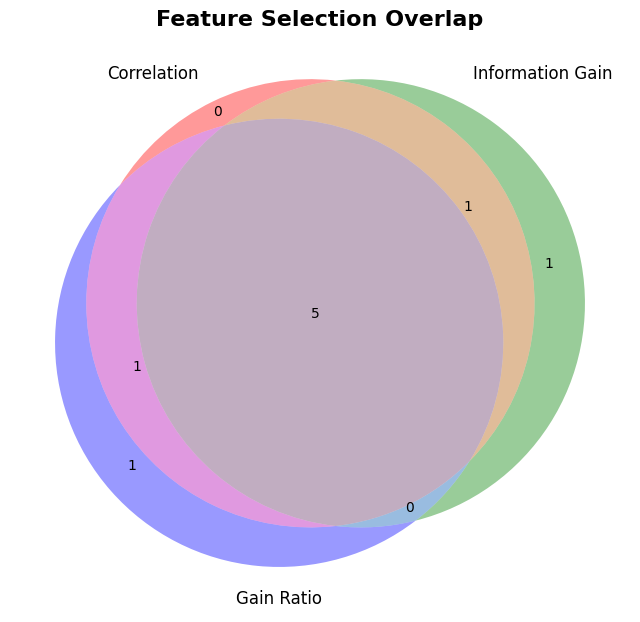

In [27]:
!pip install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
plt.figure(figsize=(8,8))
venn3([set_corr, set_info, set_gain],
      set_labels=('Correlation', 'Information Gain', 'Gain Ratio'))

plt.title("Feature Selection Overlap", fontsize=16, weight='bold')
plt.show()

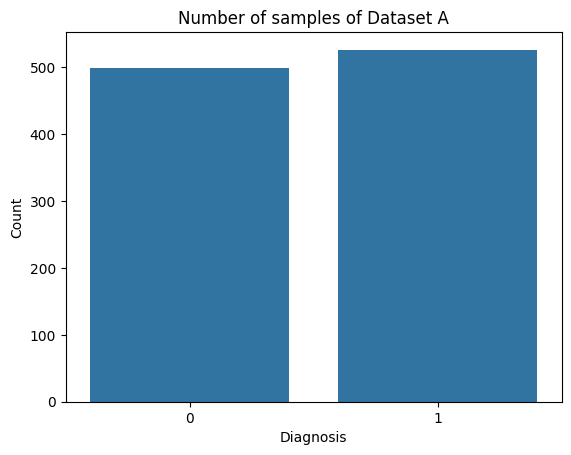

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('Number of samples of Dataset A.pdf', bbox_inches='tight')
plt.show()

In [29]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 14


age
Skew : -0.25


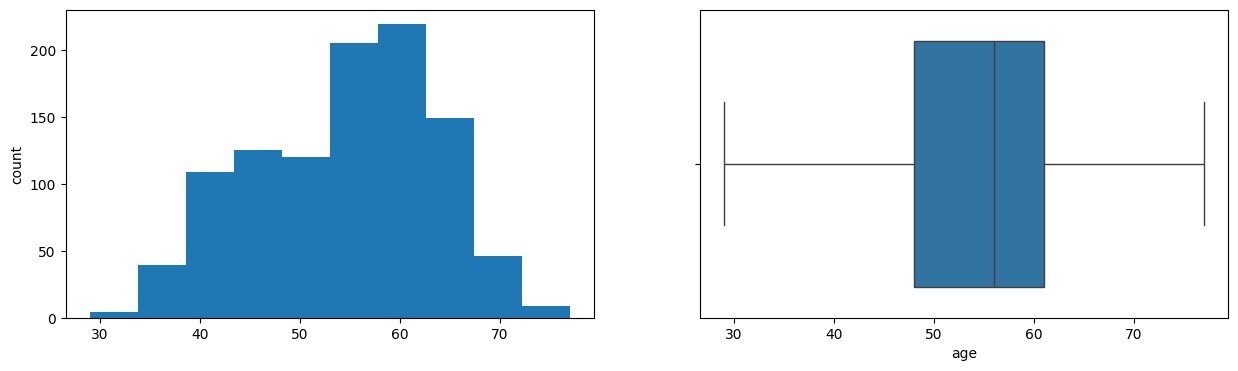

sex
Skew : -0.85


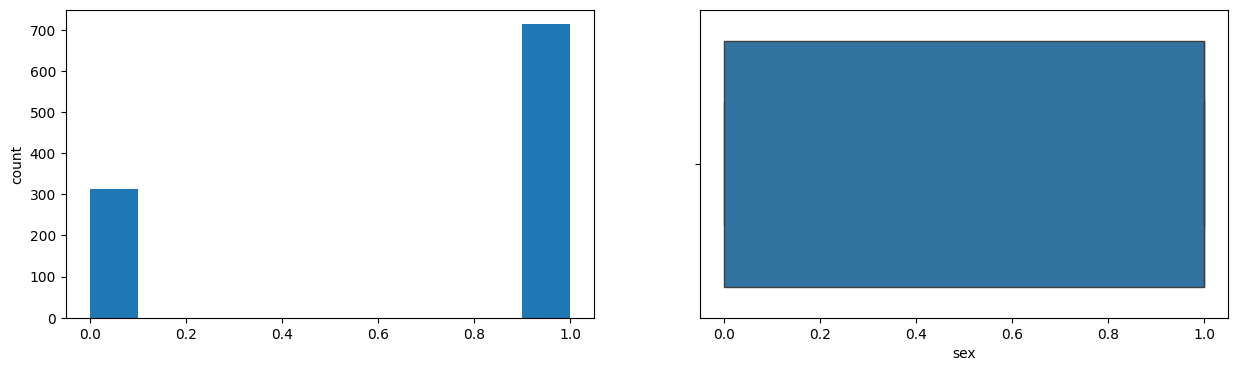

cp
Skew : 0.53


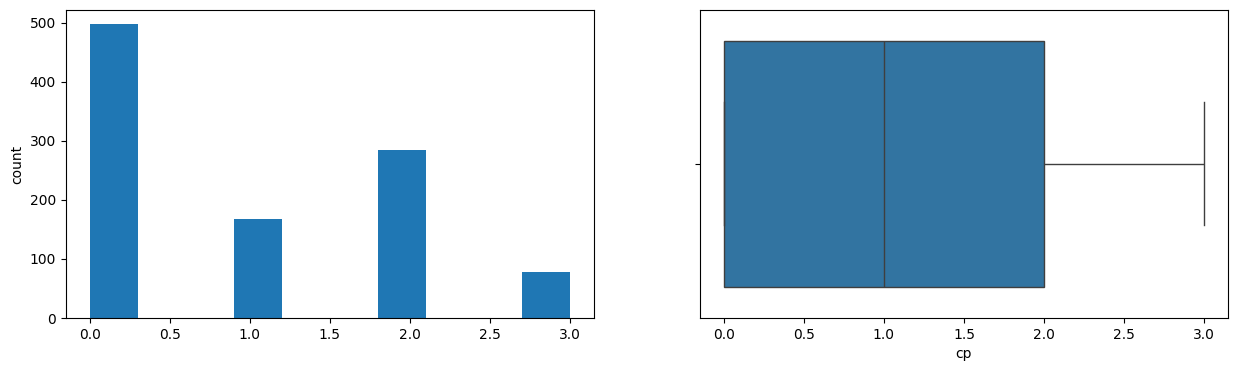

trestbps
Skew : 0.74


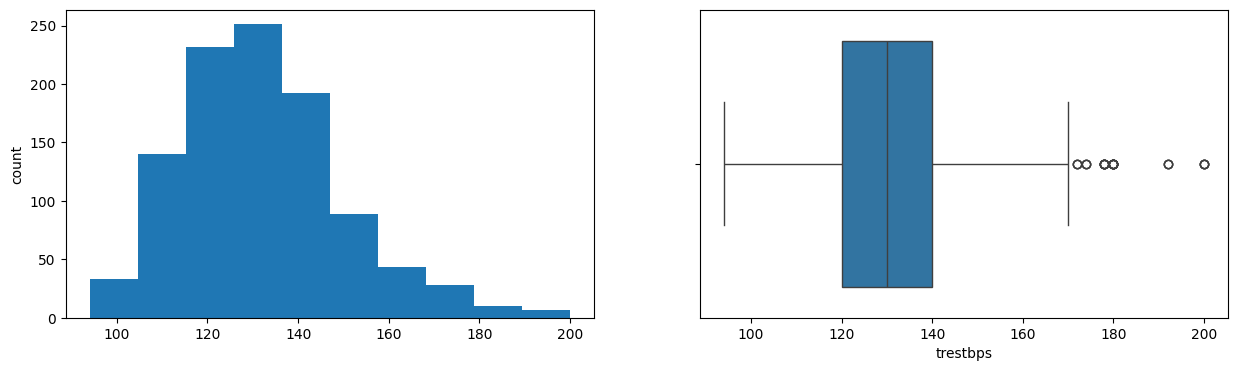

chol
Skew : 1.07


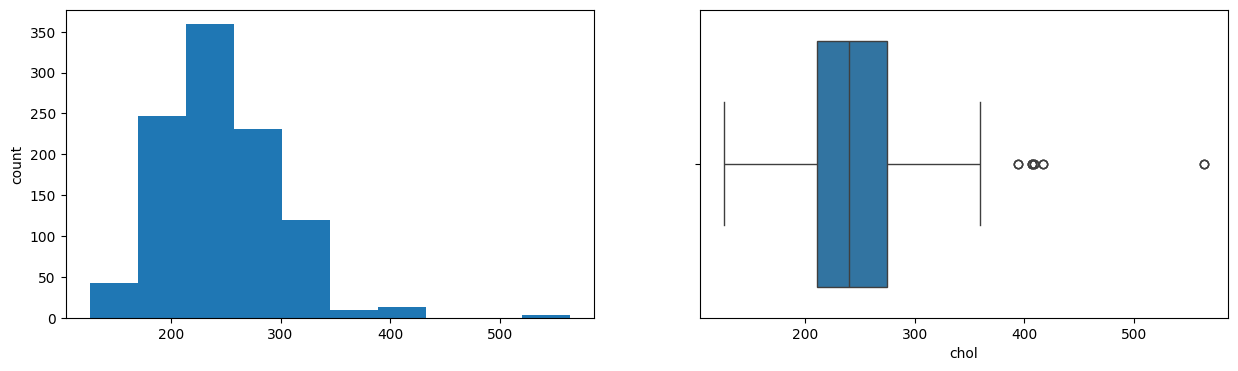

fbs
Skew : 1.97


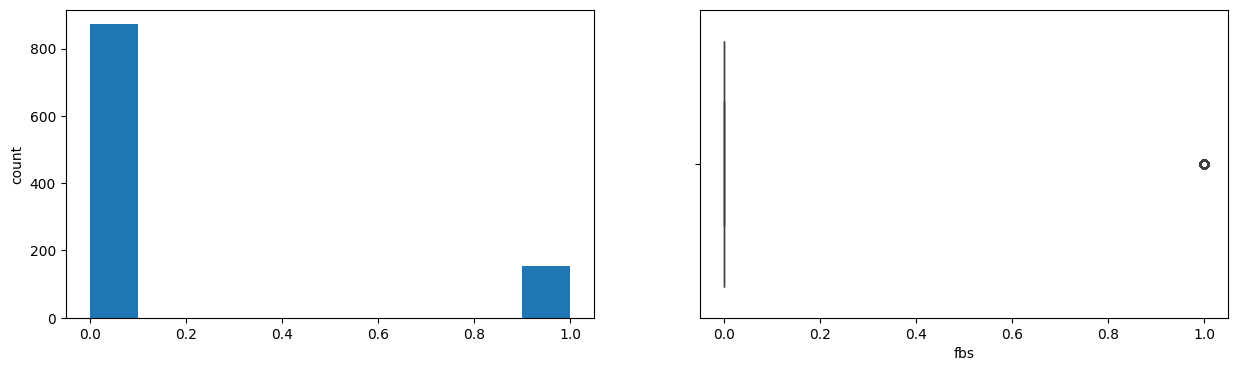

restecg
Skew : 0.18


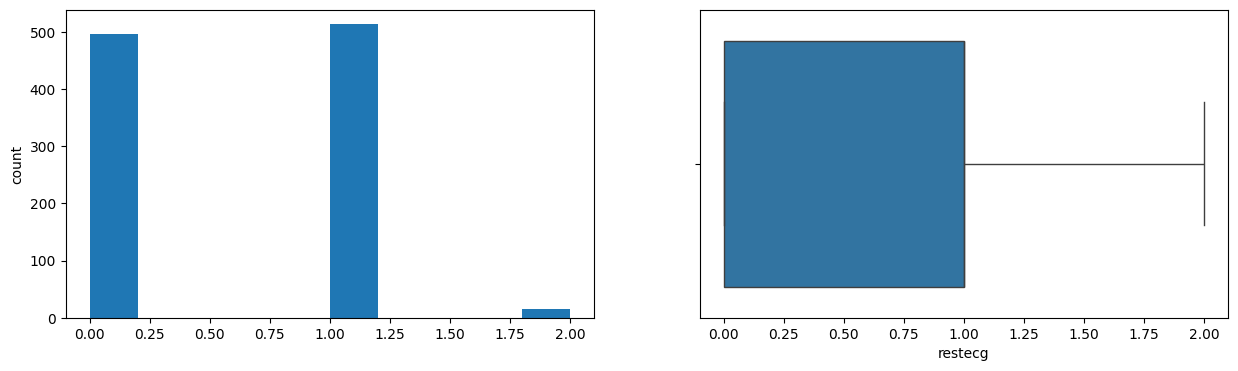

thalach
Skew : -0.51


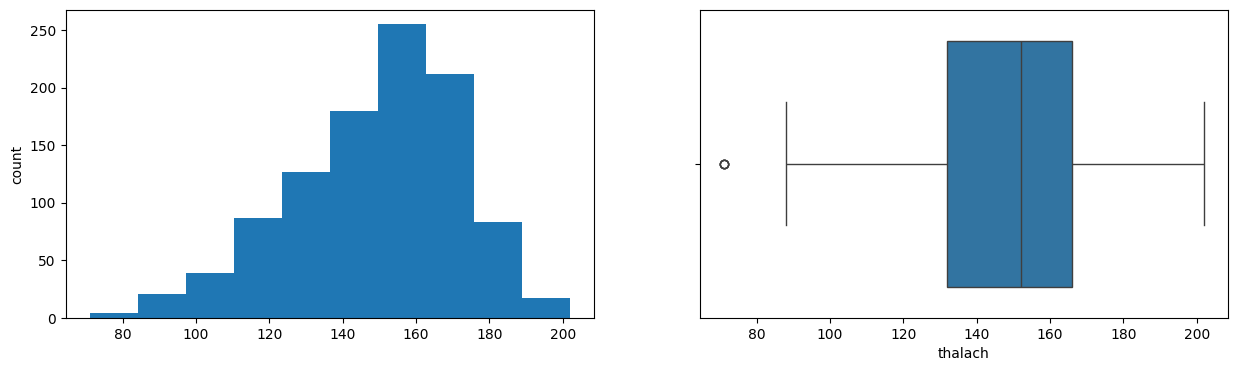

exang
Skew : 0.69


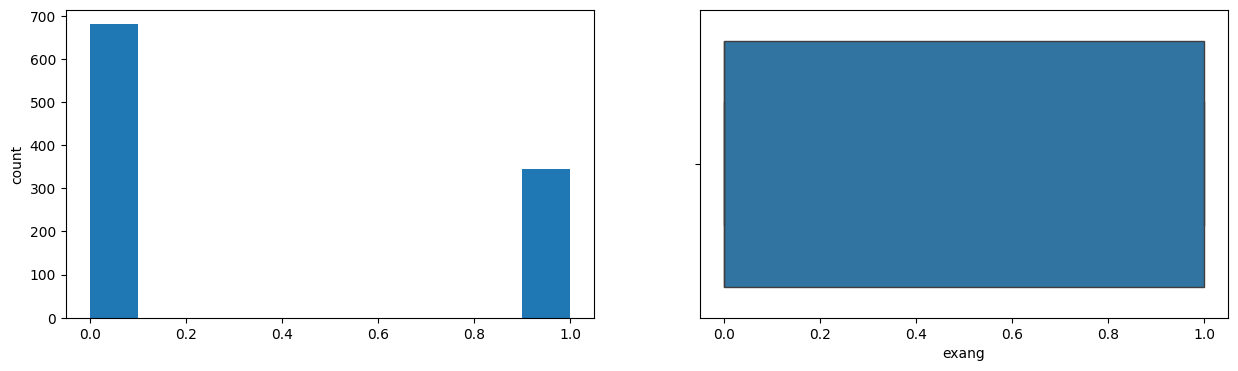

oldpeak
Skew : 1.21


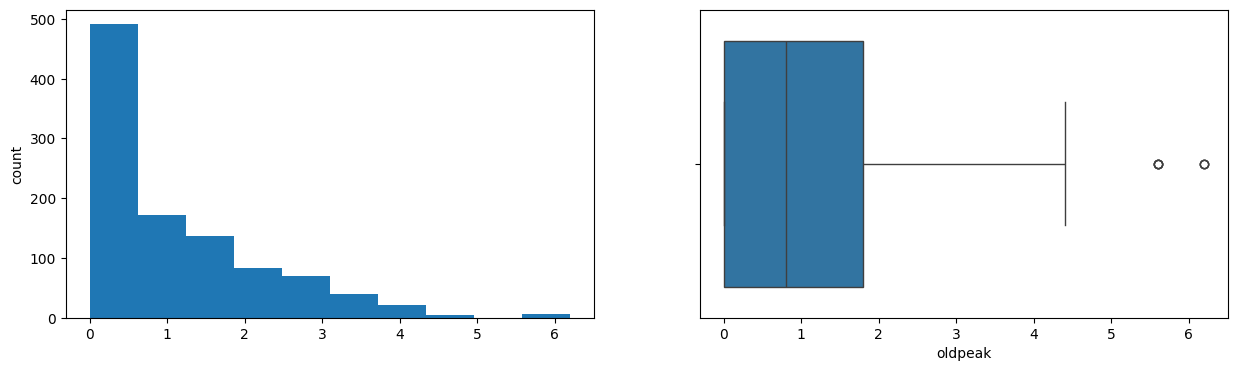

slope
Skew : -0.48


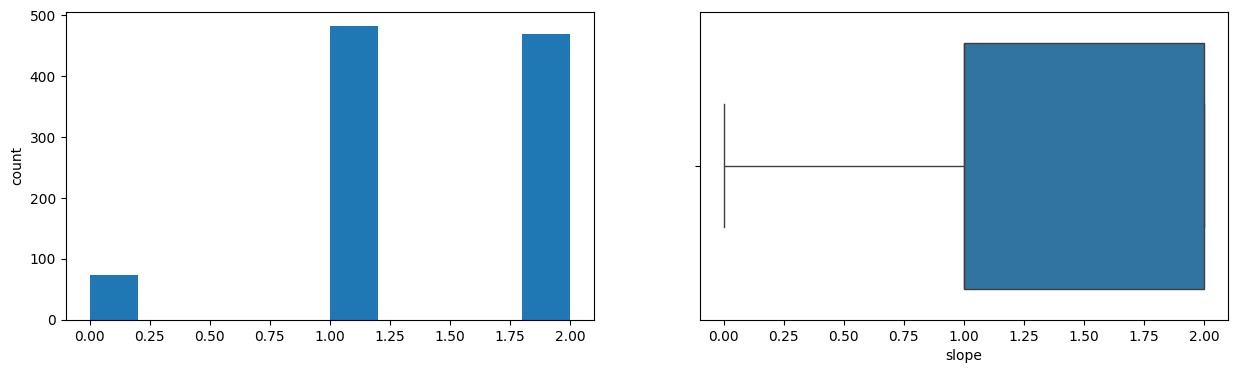

ca
Skew : 1.26


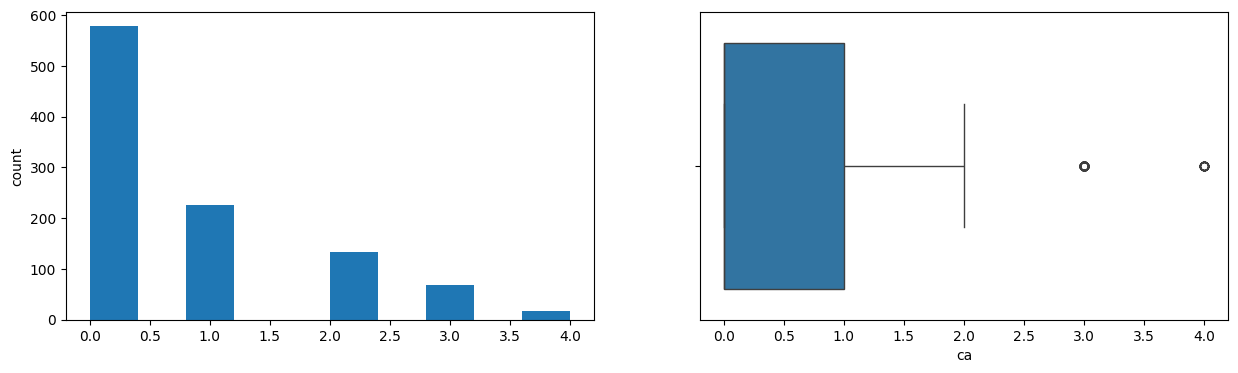

thal
Skew : -0.52


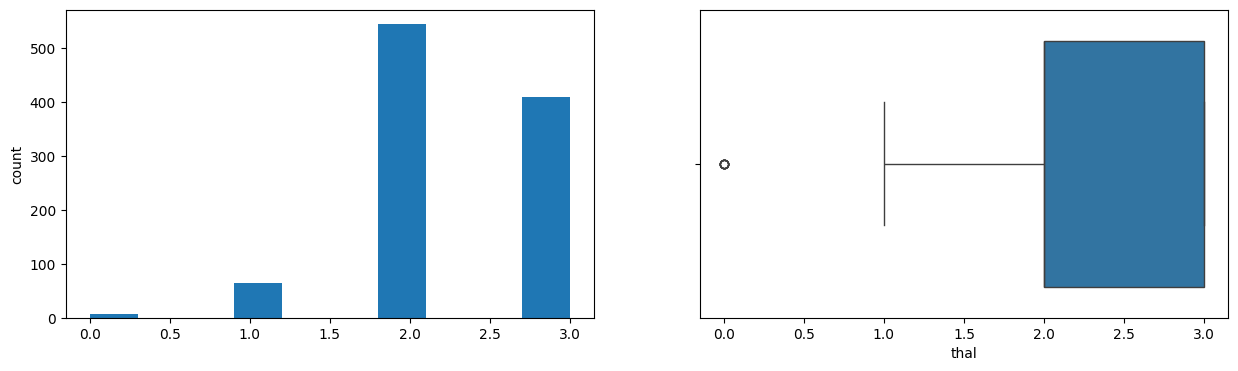

target
Skew : -0.05


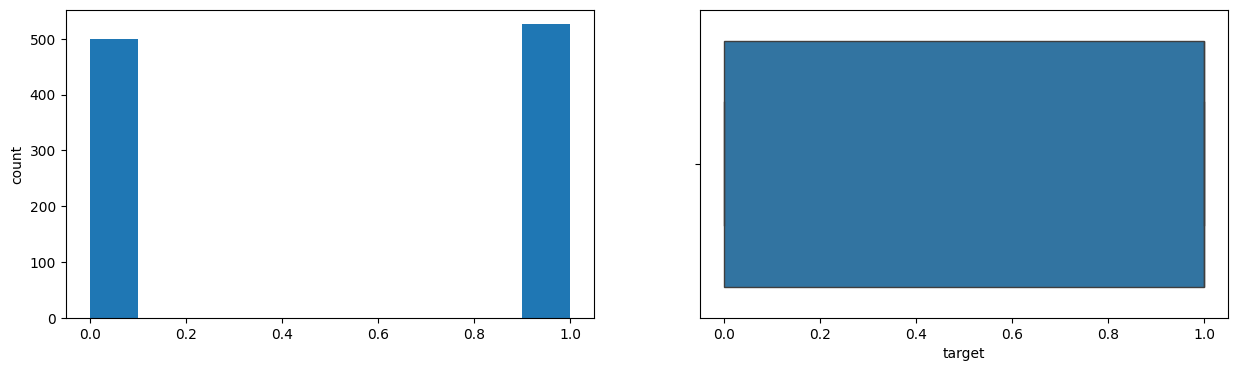

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

# **Model Train**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset load
file_path = "/content/HeartDisease.csv"
df = pd.read_csv(file_path)

# Selected features (Hybrid)
selected_features = ['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal']
X = df[selected_features]
y = df['target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} => Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")


# **Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate_model("RandomForest", y_test, rf_pred)


RandomForest => Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1: 1.000


# **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
evaluate_model("DecisionTree", y_test, dt_pred)


DecisionTree => Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1: 1.000


# **KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
evaluate_model("KNN", y_test, knn_pred)


KNN => Accuracy: 0.859, Precision: 0.896, Recall: 0.819, F1: 0.856


# **Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
evaluate_model("LogisticRegression", y_test, lr_pred)


LogisticRegression => Accuracy: 0.834, Precision: 0.803, Recall: 0.895, F1: 0.847


# **AdaBoost**

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
evaluate_model("AdaBoost", y_test, ada_pred)


AdaBoost => Accuracy: 0.863, Precision: 0.853, Recall: 0.886, F1: 0.869


# **Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
evaluate_model("NaiveBayes", y_test, nb_pred)


NaiveBayes => Accuracy: 0.810, Precision: 0.789, Recall: 0.857, F1: 0.822


# **SVM**

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
evaluate_model("SVM", y_test, svm_pred)


SVM => Accuracy: 0.898, Precision: 0.882, Recall: 0.924, F1: 0.902


# **XGBoost**

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
evaluate_model("XGBoost", y_test, xgb_pred)


XGBoost => Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1: 1.000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:31:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# **ANN**

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models

ann = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
ann_pred = (ann.predict(X_test) > 0.5).astype(int)
evaluate_model("ANN", y_test, ann_pred)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
ANN => Accuracy: 0.946, Precision: 0.970, Recall: 0.924, F1: 0.946


# **LSTM**

In [42]:
X_train_seq = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_seq = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm = models.Sequential([
    layers.LSTM(64, input_shape=(1, X_train.shape[1])),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_seq, y_train, epochs=50, batch_size=16, verbose=0)
lstm_pred = (lstm.predict(X_test_seq) > 0.5).astype(int)
evaluate_model("LSTM", y_test, lstm_pred)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
LSTM => Accuracy: 0.917, Precision: 0.923, Recall: 0.914, F1: 0.919


# **RNN**

In [43]:
rnn = models.Sequential([
    layers.SimpleRNN(64, input_shape=(1, X_train.shape[1])),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn.fit(X_train_seq, y_train, epochs=50, batch_size=16, verbose=0)
rnn_pred = (rnn.predict(X_test_seq) > 0.5).astype(int)
evaluate_model("RNN", y_test, rnn_pred)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
RNN => Accuracy: 0.907, Precision: 0.906, Recall: 0.914, F1: 0.910


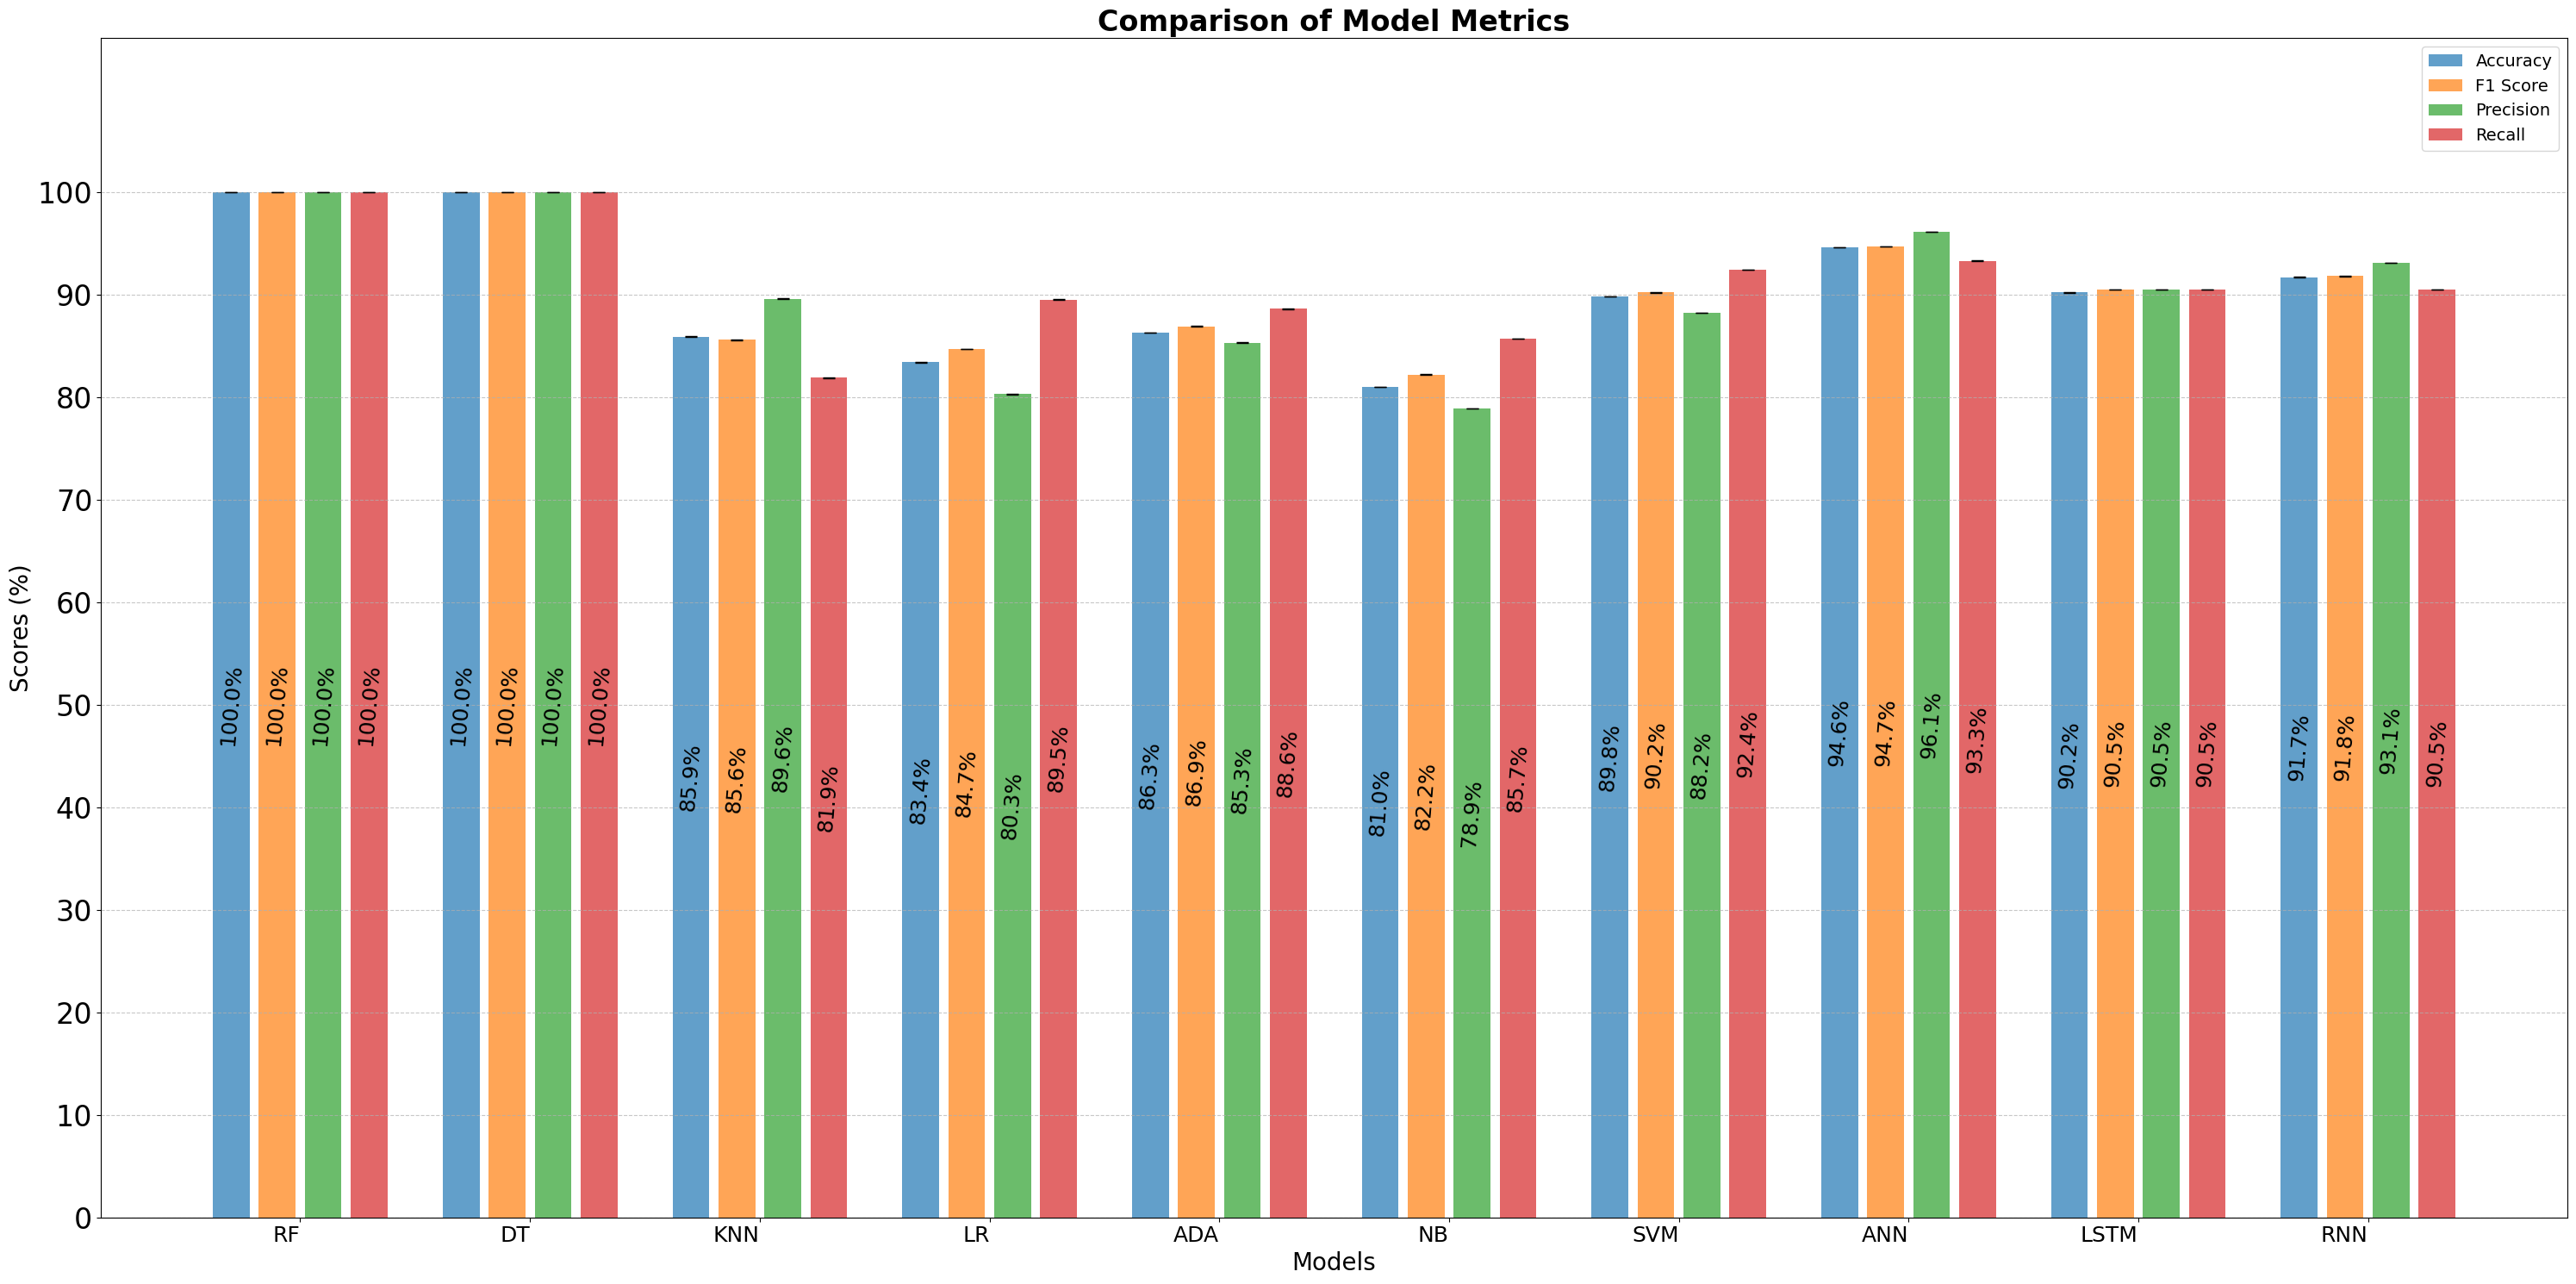

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'ANN', 'LSTM', 'RNN']

# Updated Accuracy, Precision, Recall, F1 Score based on your provided data
accuracy = [100, 100, 85.9, 83.4, 86.3, 81.0, 89.8, 94.6, 90.2, 91.7]
precision = [100, 100, 89.6, 80.3, 85.3, 78.9, 88.2, 96.1, 90.5, 93.1]
recall = [100, 100, 81.9, 89.5, 88.6, 85.7, 92.4, 93.3, 90.5, 90.5]
f1_score = [100, 100, 85.6, 84.7, 86.9, 82.2, 90.2, 94.7, 90.5, 91.8]

# Dummy error values for error bars (just example, adjust if you have actual errors)
error_accuracies = [0.01, 0.01, 0.03, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02]
error_precisions = [0.01, 0.01, 0.03, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02]
error_recalls = [0.01, 0.01, 0.03, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02]
error_f1_scores = [0.01, 0.01, 0.03, 0.03, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()
        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        ax.text(
            offset_x,
            offset_y,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=18,
            color='black',
            rotation=85,
            rotation_mode='anchor'
        )

# Styling and layout
ax.set_title('Comparison of Model Metrics', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha='right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# **XAI**

In [45]:
!pip install shap lime


  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=07255b66a0c22c5ac4c27033959324cfa6eaefcfb7d3d4b2c2eae0ebc5d60713
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

# **SHAP AND LIME**


=== Explaining Model: RF ===


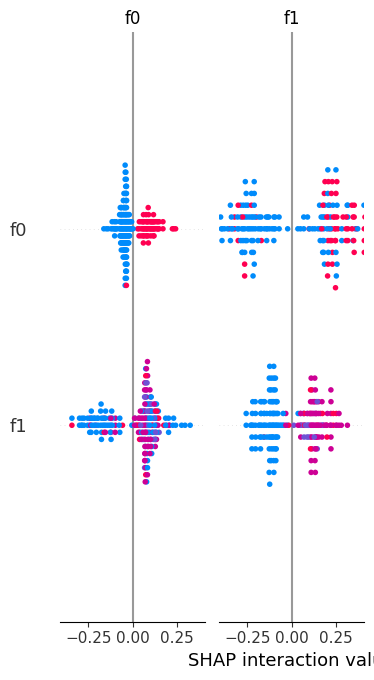

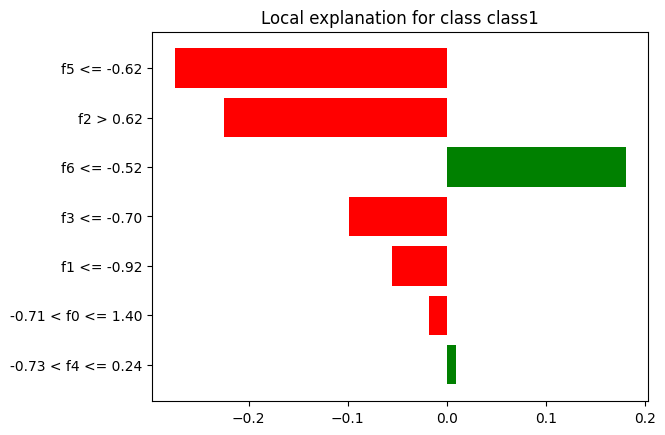


=== Explaining Model: DT ===


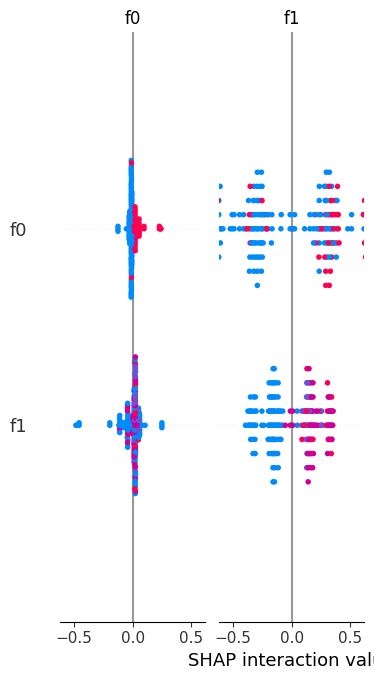

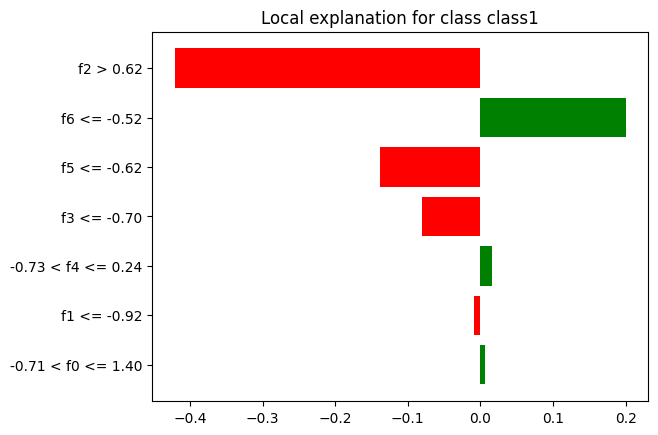


=== Explaining Model: KNN ===


  0%|          | 0/5 [00:00<?, ?it/s]

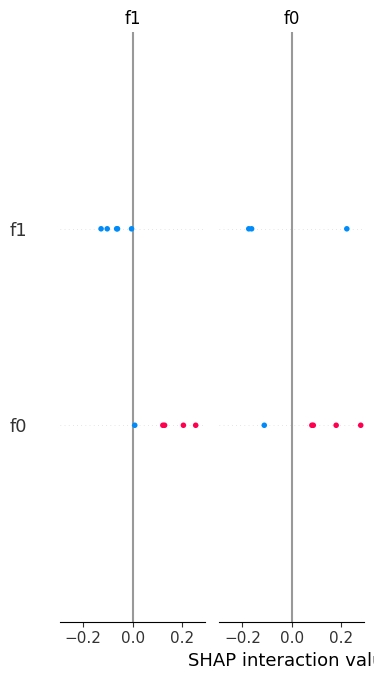

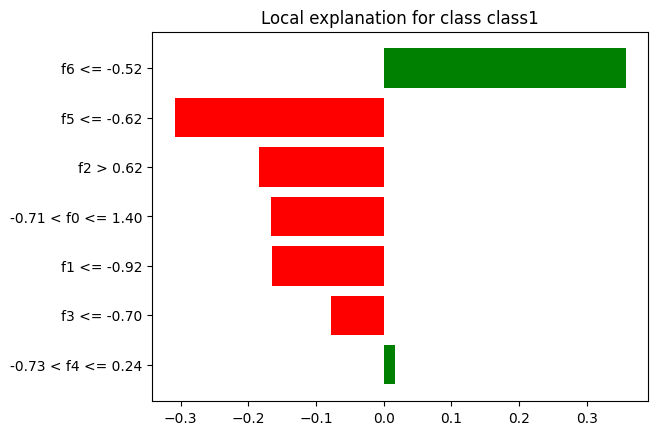


=== Explaining Model: LR ===


  0%|          | 0/5 [00:00<?, ?it/s]

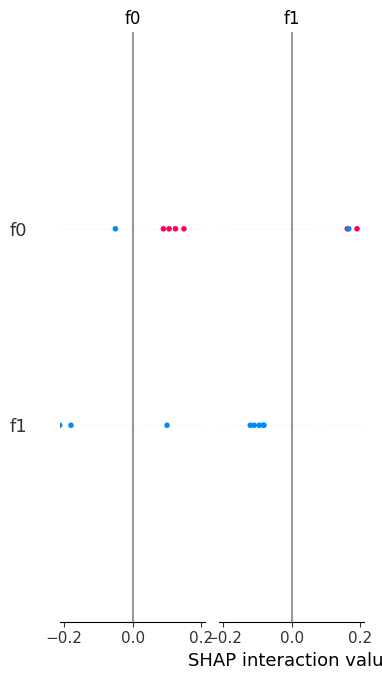

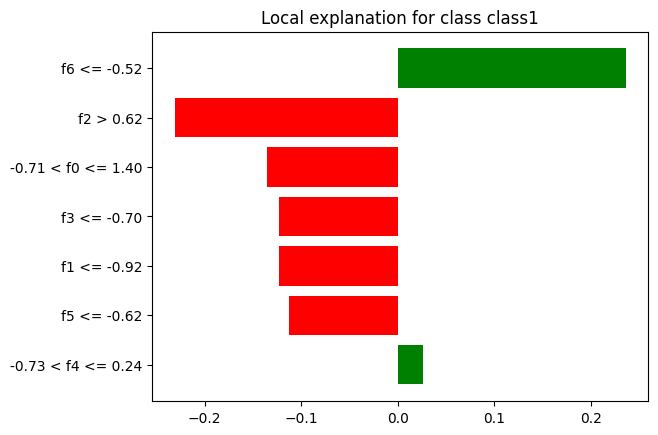


=== Explaining Model: ADA ===


  0%|          | 0/5 [00:00<?, ?it/s]

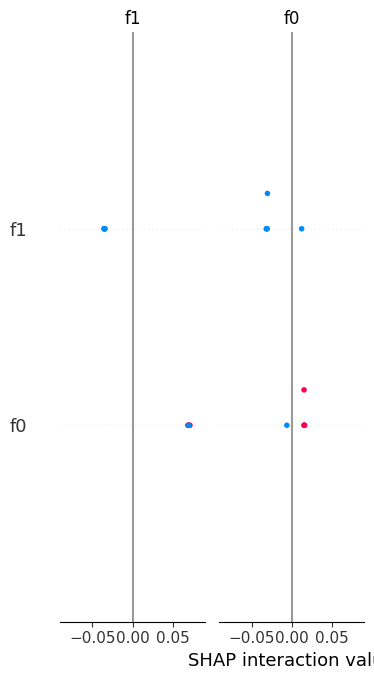

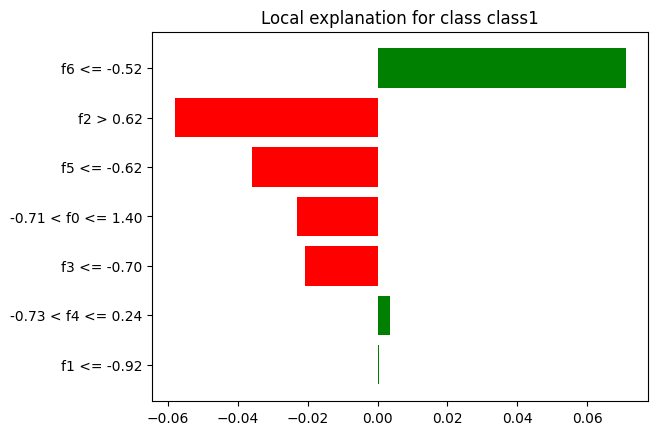


=== Explaining Model: NB ===


  0%|          | 0/5 [00:00<?, ?it/s]

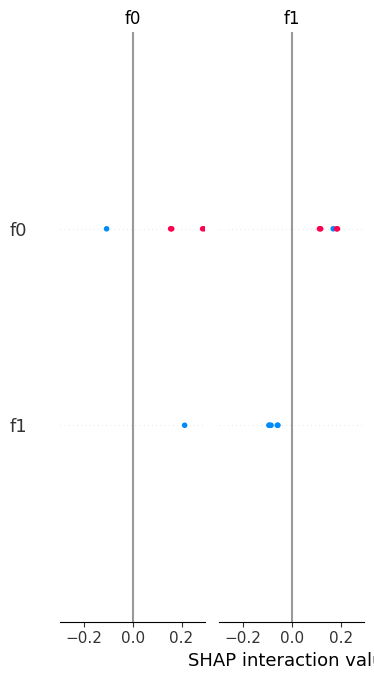

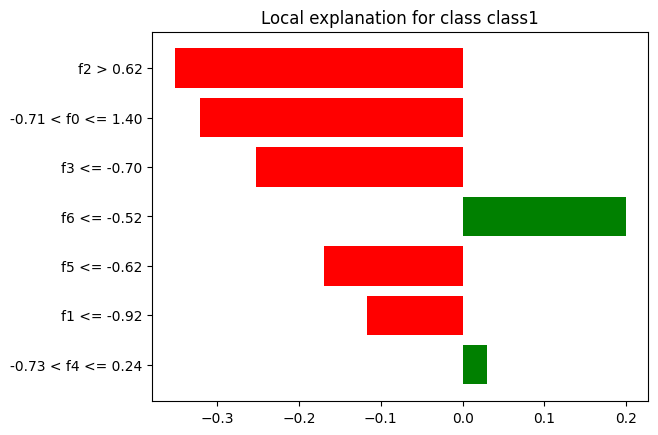


=== Explaining Model: SVM ===
SHAP not available for SVM: This 'SVC' has no attribute 'predict_proba'
LIME not available for SVM: This 'SVC' has no attribute 'predict_proba'

=== Explaining Model: ANN ===
SHAP not available for ANN: 'Sequential' object has no attribute 'predict_proba'
LIME not available for ANN: 'Sequential' object has no attribute 'predict_proba'

=== Explaining Model: LSTM ===
SHAP not available for LSTM: 'Sequential' object has no attribute 'predict_proba'
LIME not available for LSTM: 'Sequential' object has no attribute 'predict_proba'

=== Explaining Model: RNN ===
SHAP not available for RNN: 'Sequential' object has no attribute 'predict_proba'
LIME not available for RNN: 'Sequential' object has no attribute 'predict_proba'


In [47]:


import pandas as pd
import numpy as np
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"f{i}" for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)


trained_models = {
    "RF": rf,
    "DT": dt,
    "KNN": knn,
    "LR": lr,
    "ADA": ada,
    "NB": nb,
    "SVM": svm,
    "ANN": ann,
    "LSTM": lstm,
    "RNN": rnn
}



for name, model in trained_models.items():
    print(f"\n=== Explaining Model: {name} ===")

    # --------------------------
    # SHAP Explainer
    # --------------------------
    try:
        if name in ["RF", "DT"]:  # Tree-based models
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test_df)
        else:  # Other models
            # Use small background sample for KernelExplainer
            background = X_train_df.sample(50, random_state=42)
            explainer = shap.KernelExplainer(model.predict_proba, background)
            shap_values = explainer.shap_values(X_test_df.iloc[:5])  # small subset for speed

        shap.initjs()

        # Plot
        if isinstance(shap_values, list):
            # multi-class
            for i in range(len(shap_values)):
                print(f"SHAP summary plot for class {i}")
                shap.summary_plot(shap_values[i], X_test_df.iloc[:5] if name not in ["RF","DT"] else X_test_df, show=False)
                plt.show()
        else:
            shap.summary_plot(shap_values, X_test_df.iloc[:5] if name not in ["RF","DT"] else X_test_df, show=False)
            plt.show()
    except Exception as e:
        print(f"SHAP not available for {name}: {e}")

    # --------------------------
    # LIME Explainer
    # --------------------------
    try:
        lime_explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train_df.values,
            feature_names=X_train_df.columns,
            class_names=[f"class{i}" for i in np.unique(y_train)],
            mode="classification"
        )

        i = 0  # first test instance
        exp = lime_explainer.explain_instance(
            data_row=X_test_df.iloc[i].values,
            predict_fn=model.predict_proba
        )
        fig = exp.as_pyplot_figure()
        plt.show()
    except Exception as e:
        print(f"LIME not available for {name}: {e}")


In [48]:
!pip install streamlit shap lime pandas scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 131.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [streamlit]


2025-10-22 04:32:54.458 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-22 04:32:54.460 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-22 04:32:54.462 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:32:54.980 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-22 04:32:54.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:32:54.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:32:54.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:32:54.999 Thread 'MainThread': missin

2025-10-22 04:33:01.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:33:01.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:33:01.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:33:01.958 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:33:01.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:33:01.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 04:33:01.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature n

DeltaGenerator()

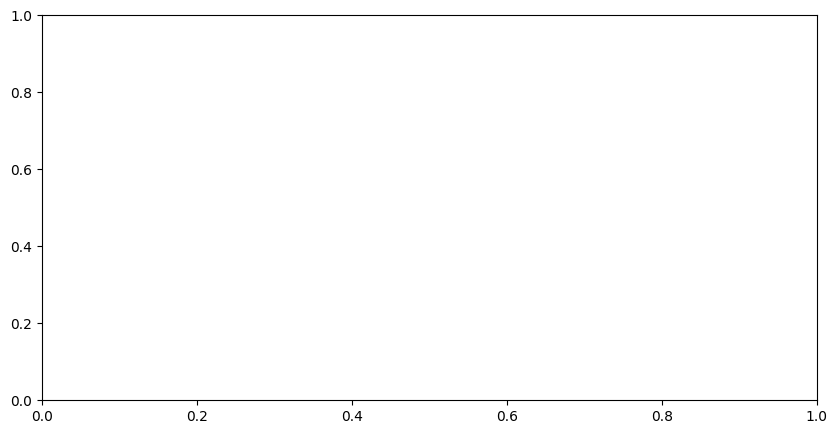

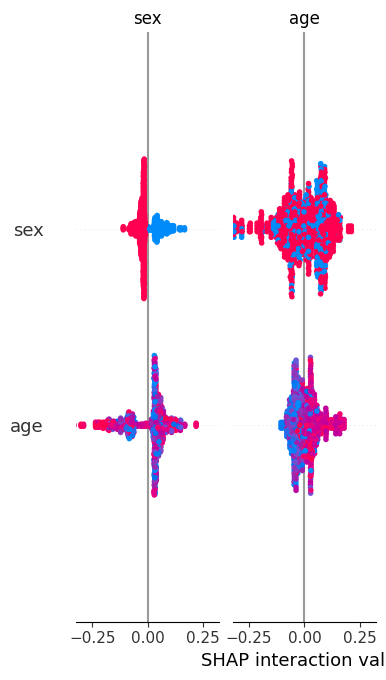

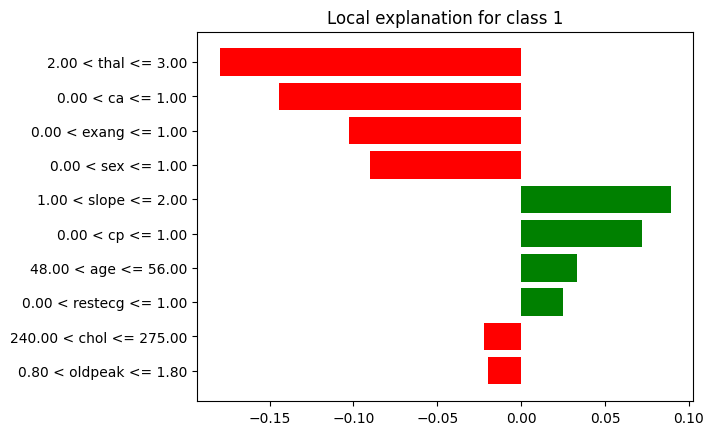

In [49]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# -----------------------
# Load your dataset
# -----------------------
@st.cache_data
def load_data():
    df = pd.read_csv("/content/HeartDisease.csv")  # replace with your CSV
    X = df.drop("target", axis=1)
    y = df["target"]
    return X, y

X, y = load_data()

# -----------------------
# Train a simple model
# -----------------------
@st.cache_resource
def train_model():
    rf = RandomForestClassifier()
    rf.fit(X, y)
    return rf

model = train_model()

# -----------------------
# Streamlit layout
# -----------------------
st.title("Model Prediction & Feature Explanation")
st.write("Upload CSV or input values manually to get prediction and explanation.")

# Option 1: Upload CSV
uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
else:
    # Option 2: Manual input
    input_data = {}
    for col in X.columns:
        val = st.number_input(f"Input {col}", value=float(X[col].mean()))
        input_data[col] = [val]
    input_df = pd.DataFrame(input_data)

# -----------------------
# Prediction
# -----------------------
st.subheader("Prediction")
pred = model.predict(input_df)
pred_proba = model.predict_proba(input_df)
st.write(f"Predicted class: {pred[0]}")
st.write(f"Prediction probabilities: {pred_proba}")

# -----------------------
# SHAP Explanation
# -----------------------
st.subheader("SHAP Feature Importance")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.initjs()
fig, ax = plt.subplots(figsize=(10,5))
shap.summary_plot(shap_values, X, show=False)
st.pyplot(fig)

# -----------------------
# LIME Explanation
# -----------------------
st.subheader("LIME Explanation (first sample)")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    mode="classification"
)
exp = lime_explainer.explain_instance(
    data_row=input_df.iloc[0].values,
    predict_fn=model.predict_proba
)
fig2 = exp.as_pyplot_figure()
st.pyplot(fig2)


# **DEPLOYMENT**

In [50]:
import pickle

pickle.dump(rf, open("/content/RF_model.pkl", "wb"))
pickle.dump(dt, open("/content/DT_model.pkl", "wb"))
pickle.dump(knn, open("/content/KNN_model.pkl", "wb"))
pickle.dump(lr, open("/content/LR_model.pkl", "wb"))
pickle.dump(ada, open("/content/ADA_model.pkl", "wb"))
pickle.dump(nb, open("/content/NB_model.pkl", "wb"))
pickle.dump(svm, open("/content/SVM_model.pkl", "wb"))
pickle.dump(ann, open("/content/ANN_model.pkl", "wb"))


In [51]:
from tensorflow.keras.models import load_model

lstm.save("/content/LSTM_model.h5")
rnn.save("/content/RNN_model.h5")


In [70]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Page setup
# ------------------------------
st.set_page_config(page_title="Heart Disease Predictor", layout="centered")
st.title("Heart Disease Prediction App")
st.write("Predict heart disease using hybrid-selected features")

# ------------------------------
# Feature list (Hybrid)
# ------------------------------
features = ['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal']

# ------------------------------
# Load your dataset (for demo)
# ------------------------------
data_path = "/content/HeartDisease.csv"
df = pd.read_csv(data_path)

# ------------------------------
# Sidebar for model selection
# ------------------------------
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'ANN', 'LSTM', 'RNN']
selected_model = st.sidebar.selectbox("Select Model", models)

st.sidebar.write("Selected model:", selected_model)

# ------------------------------
# Load trained model (Pickle)
# ------------------------------
try:
    model = pickle.load(open(f"/content/{selected_model}_model.pkl", "rb"))
except:
    st.warning(f"⚠️ Trained model file not found for {selected_model}. Please ensure /content/{selected_model}_model.pkl exists.")
    st.stop()

# ------------------------------
# Option 1: Manual Input
# ------------------------------
st.header("🧠 Enter Patient Data")

input_data = {}
for feature in features:
    input_data[feature] = st.number_input(f"{feature}", value=float(df[feature].mean()))

input_df = pd.DataFrame([input_data])

# # ------------------------------
# # Option 2: CSV Upload
# # ------------------------------
st.header("📂 Upload CSV for Bulk Prediction")
uploaded_file = st.file_uploader("Upload CSV file with same feature columns", type=['csv'])

# ------------------------------
# Prediction Function
# ------------------------------
def predict(model, X):
    preds = model.predict(X)
    return preds

# ------------------------------
# Manual prediction
# ------------------------------
if st.button("Predict (Manual Input)"):
    pred = predict(model, input_df)[0]
    result = "✅ Heart Disease Detected" if pred == 1 else " No Heart Disease"
    st.subheader(f"Prediction: {result}")

# # ------------------------------
# # CSV prediction
# # ------------------------------
if uploaded_file is not None:
    csv_data = pd.read_csv(uploaded_file)
    if all(col in csv_data.columns for col in features):
        random_sample = csv_data.sample(10, random_state=42)

        preds = predict(model, random_sample[features])

        # Convert 0 -> "No", 1 -> "Yes"
        preds = ["Yes" if p == 1 else "No" for p in preds]

        random_sample['Prediction'] = preds

        st.write(random_sample)
        st.success("✅ Prediction Complete for 10 Random Rows!")
    else:
        st.error("Uploaded CSV does not have the required feature columns.")





Overwriting app.py


In [66]:
!pip install streamlit pyngrok


In [60]:
!pip install pyngrok
from pyngrok import ngrok

!ngrok config add-authtoken 345iFKsKqWoxZNjdU8F2DVyJFOC_4CELLjDC4V4izxy7ZBCbe

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [67]:
# ==============================
# ✅ 2025 Updated Streamlit Deployment for Colab
# ==============================

!pip install streamlit pyngrok

# 🧩 তোমার ngrok authtoken বসাও নিচে
NGROK_AUTH_TOKEN = "345iFKsKqWoxZNjdU8F2DVyJFOC_4CELLjDC4V4izxy7ZBCbe"

from pyngrok import ngrok, conf

# Auth token সেট করো
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Streamlit background এ চালাও
!streamlit run app.py &>/dev/null &

# ✅ Updated tunnel connection (no port field)
public_url = ngrok.connect(8501, "http")
print("🌐 Streamlit App URL:", public_url.public_url)


🌐 Streamlit App URL: https://overmelodious-courageously-yung.ngrok-free.dev
